In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

Logistic regression is a supervised learning (has labeled data as input) algorithm for classification. The algorithm is fed with samples - with multiple features and it's corresponding classes (labels).

- $M$ - Number of samples
- $N$ - Number of features
- $\boldsymbol{\theta}$ - Vector of minimizing parameters
- $\mathbf{X}$ - Matrix of features (columns) per samples (rows)
- $\mathbf{y}$ - Vector of corresponding labels

In [2]:
M = 100
M_half = 50
N = 2

X1 = np.array([[random.gauss(2,1.25), random.gauss(3,1.25)] for i in range(M_half)])
y1 = np.array((M_half)*[1])

X2 = np.array([[random.gauss(0,1.25), random.gauss(-1,1.25)] for i in range(M_half)])
y2 = np.array((M_half)*[0])

X = np.vstack([X1, X2])
y = np.hstack([y1.T, y2.T])

y = y.reshape([M,1])

print("    x1    |     x2    |     y    ")
for i in range(M):
    print("%9.4f | %9.4f | %9.4f" % (X[i,0], X[i,1], y[i,0]))

    x1    |     x2    |     y    
   2.7506 |    2.3027 |    1.0000
   1.4059 |    1.6603 |    1.0000
   1.9807 |    3.0419 |    1.0000
   4.1599 |    1.3317 |    1.0000
   1.4337 |    2.2563 |    1.0000
   2.9739 |    4.1976 |    1.0000
   1.4143 |    2.6757 |    1.0000
   3.3308 |    1.3162 |    1.0000
   2.8984 |    3.7496 |    1.0000
   1.8470 |    2.8422 |    1.0000
   1.7192 |    2.4474 |    1.0000
   1.2184 |    3.5466 |    1.0000
   3.0577 |    4.2512 |    1.0000
   2.3979 |    2.5504 |    1.0000
   3.8062 |    4.1902 |    1.0000
   1.6444 |    2.2986 |    1.0000
   1.8459 |    2.5741 |    1.0000
   0.9288 |    4.8388 |    1.0000
   0.7738 |    2.6180 |    1.0000
   1.4003 |    2.7802 |    1.0000
   2.0816 |    4.8188 |    1.0000
   3.5204 |    3.2061 |    1.0000
   0.8418 |    4.4350 |    1.0000
  -1.2157 |    2.2593 |    1.0000
   1.4477 |    2.2975 |    1.0000
   1.5954 |    2.0332 |    1.0000
   2.4853 |    3.6884 |    1.0000
   0.3999 |    1.7609 |    1.0000
   1.9801 |   

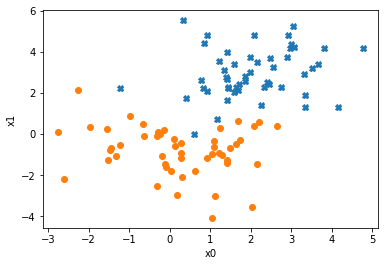

In [3]:
plt.plot(X[:M_half,0], X[:M_half,1], 'X'), plt.xlabel('x0'), plt.ylabel('x1')
plt.plot(X[M_half:,0], X[M_half:,1], 'o'), plt.xlabel('x0'), plt.ylabel('x1')
plt.show()

# Feature scaling (rescale and mean normalization)

One way of feature scaling is to keep the average of each feature as a predefined number (e.g. 0) and scale the values between the range of values. We can define two vectors mu and delta for keeping these numbers:

$$\mu_n = \frac{1}{M}\sum\limits_{m = 0}^M x_{mn}$$  
$$\delta_n = max(\mathbf{x_n}) - min(\mathbf{x_n})$$  
$$x_{mn} \leftarrow \frac{x_{mn} - \mu_{n}}{\delta_n}$$  

In [4]:
mu = np.array([np.average(X[:,0]), np.average(X[:,1])])
delta = np.array([(np.max(X[:,0]) - np.min(X[:,0])), (np.max(X[:,1]) - np.min(X[:,1]))])

X = (X - np.ones([M,1])*mu)*(np.ones([M,1])*(1/delta))

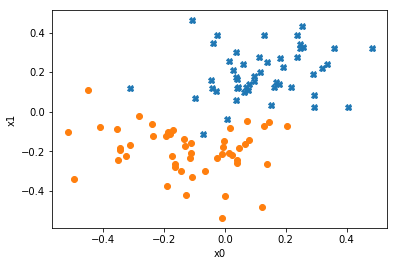

In [5]:
plt.plot(X[:M_half,0], X[:M_half,1], 'X'), plt.xlabel('x0'), plt.ylabel('x1')
plt.plot(X[M_half:,0], X[M_half:,1], 'o'), plt.xlabel('x0'), plt.ylabel('x1')
plt.show()

# Hyphotesis and Cost function

The objective of the logistic regression is to find a *hyphotesis function*  $\mathbf{h_\theta} = \mathbf{h_\theta (X)}$ - or the parameters of this function $\boldsymbol{\theta}$ - such as the *cost function* $v = v(\mathbf{X}, \mathbf{y}, \boldsymbol{\theta})$ - diference between predictions and labels - is minimized.

In linear regression, the most general hypothesis was:

$$\mathbf{h_\theta} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_Nx_N$$

If we define an matrix $\mathbf{X'}$ such as the first column (first feature) is always 1, then we can write:

$$\mathbf{h_\theta} = \sum \limits_{n = 0}^N \theta_nx'_n$$  

or in vectorized notation:

$$\mathbf{h_\theta} = \mathbf{X'\theta}$$

In the case of logistic regression, it is best that the values range between 0 and 1, representing the probability of the selected point being marked as pertencent of the class (y = 1). We can use the logistic function (sigmoid) for the hypothesis:

![Logistic Curve](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

$$\mathbf{g}(\mathbf{z}) = \frac{1}{1+e^{-\mathbf{z}}} = \frac{e^{\mathbf{z}}}{e^{\mathbf{z}}+1}$$

So we can define the hypothesis as:

$$\mathbf{h_\theta} = \mathbf{g}(\mathbf{X'}\boldsymbol{\theta}) = \frac{1}{1+e^{-\mathbf{X'}\boldsymbol{\theta}}}$$

One possibility of cost function for a hypothis ranging between 0 and 1 is to use the *Cross-entropy cost* formula:  

$$v = -\frac{1}{M}\sum \limits_{m = 1}^{M}[y_m log(h_\theta(\mathbf{x_m})) + (1-y_m)log(1 - h_\theta(\mathbf{x_m}))]$$  

Or in the vectorized notation (thus less computacionaly demanding):  

$$v = -\frac{1}{M}[\mathbf{y} log(\mathbf{h_\theta}) + (\mathbf{1_m}-\mathbf{y})log(\mathbf{1_m} - \mathbf{h_\theta})]$$ 

In [6]:
X_prime = np.hstack((np.ones((M,1)), X)); X_prime

array([[  1.00000000e+00,   2.16554843e-01,   1.25638366e-01],
       [  1.00000000e+00,   3.74410408e-02,   5.88999224e-02],
       [  1.00000000e+00,   1.14008875e-01,   2.02433631e-01],
       [  1.00000000e+00,   4.04277035e-01,   2.47624427e-02],
       [  1.00000000e+00,   4.11425463e-02,   1.20813586e-01],
       [  1.00000000e+00,   2.46309225e-01,   3.22496623e-01],
       [  1.00000000e+00,   3.85708585e-02,   1.64393085e-01],
       [  1.00000000e+00,   2.93847968e-01,   2.31453725e-02],
       [  1.00000000e+00,   2.36251433e-01,   2.75957514e-01],
       [  1.00000000e+00,   9.62005339e-02,   1.81681926e-01],
       [  1.00000000e+00,   7.91738081e-02,   1.40666186e-01],
       [  1.00000000e+00,   1.24759128e-02,   2.54867607e-01],
       [  1.00000000e+00,   2.57466960e-01,   3.28071510e-01],
       [  1.00000000e+00,   1.69573686e-01,   1.51371444e-01],
       [  1.00000000e+00,   3.57171334e-01,   3.21733277e-01],
       [  1.00000000e+00,   6.92128186e-02,   1.2521638

In [7]:
theta = np.zeros([N+1,1])

In [8]:
g = lambda z: 1/(1 + np.exp(-z))

In [9]:
h = lambda X, theta: g(np.dot(X, theta))

In [10]:
def v (X, y, theta):
    return -(sum(y*np.log(h(X, theta)) + (1 - y)*np.log(1 - h(X, theta)))/(M))[0]

In [11]:
v(X_prime, y, theta)

0.69314718055994584

In [12]:
def gradient_step(X, y, theta, alpha=1):
    return theta - alpha*(np.dot(X.T, (h(X,theta)-y)))/M

In [13]:
axis_x1 = np.linspace(-50, 150, 100)/100
axis_x2 = np.linspace(-50, 150, 100)/100
axis_X = np.vstack([axis_x1, axis_x2])

iter =  0
theta = 0.0000, 0.0000, 0.0000
cost function = 0.6931



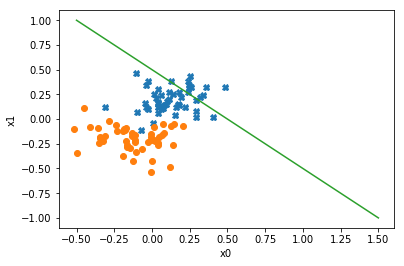

iter =  1
theta = 0.0000, 0.6053, 0.9790
cost function = 0.5723



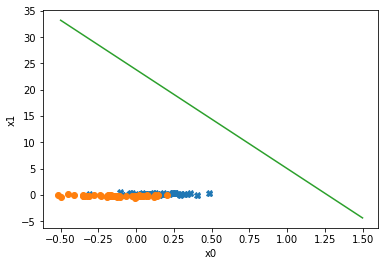

iter =  2
theta = 0.0004, 1.0924, 1.7945
cost function = 0.4895



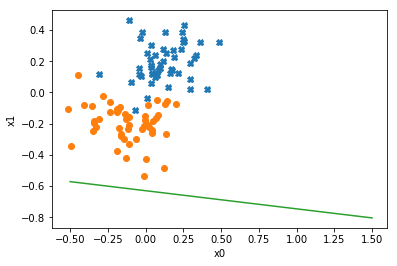

iter =  3
theta = 0.0017, 1.4895, 2.4840
cost function = 0.4309



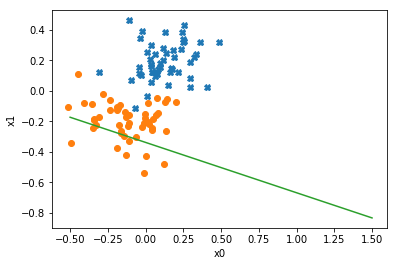

iter =  4
theta = 0.0033, 1.8196, 3.0782
cost function = 0.3878



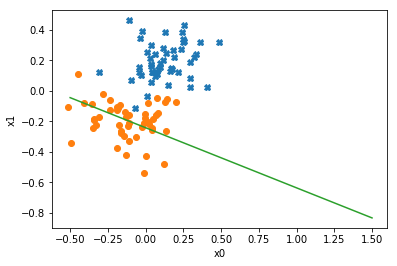

iter =  5
theta = 0.0056, 2.0992, 3.5995
cost function = 0.3549



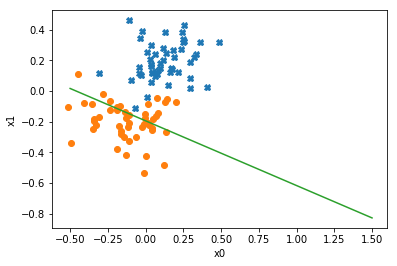

iter =  6
theta = 0.0077, 2.3400, 4.0640
cost function = 0.3289



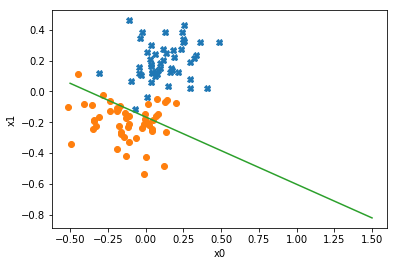

iter =  7
theta = 0.0104, 2.5501, 4.4832
cost function = 0.3080



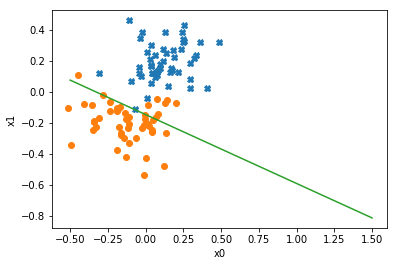

iter =  8
theta = 0.0128, 2.7358, 4.8657
cost function = 0.2907



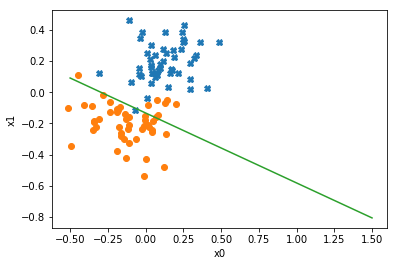

iter =  9
theta = 0.0155, 2.9012, 5.2178
cost function = 0.2761



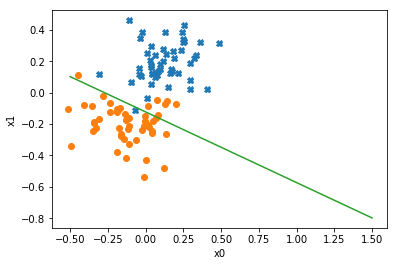

iter =  10
theta = 0.0180, 3.0500, 5.5443
cost function = 0.2637



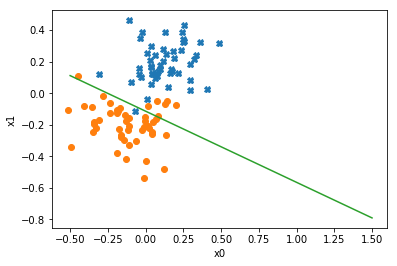

iter =  11
theta = 0.0206, 3.1846, 5.8490
cost function = 0.2530



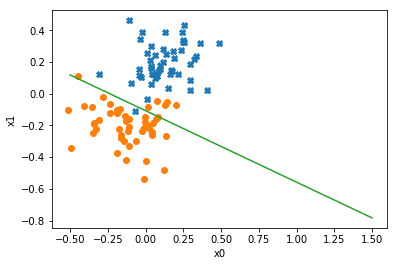

iter =  12
theta = 0.0231, 3.3072, 6.1349
cost function = 0.2436



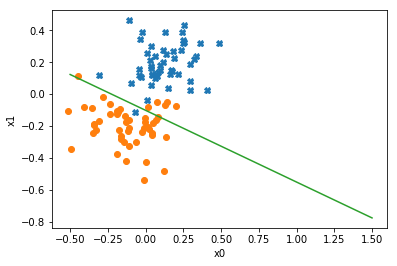

iter =  13
theta = 0.0256, 3.4194, 6.4043
cost function = 0.2354



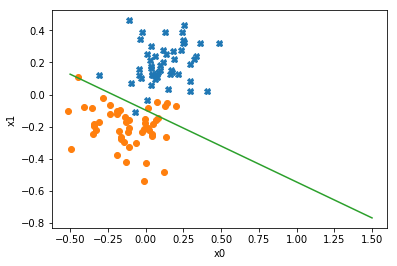

iter =  14
theta = 0.0281, 3.5225, 6.6594
cost function = 0.2280



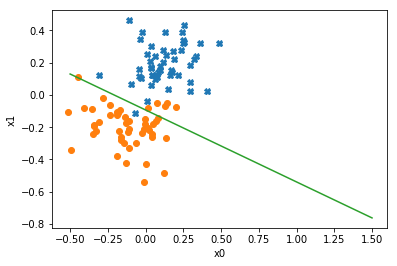

iter =  15
theta = 0.0305, 3.6176, 6.9016
cost function = 0.2214



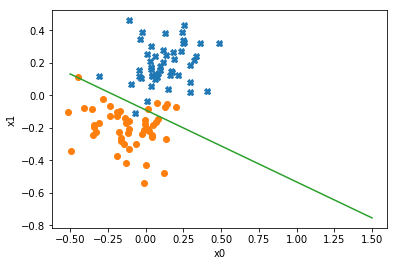

iter =  16
theta = 0.0328, 3.7057, 7.1324
cost function = 0.2154



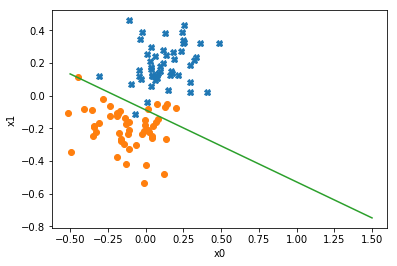

iter =  17
theta = 0.0352, 3.7876, 7.3530
cost function = 0.2100



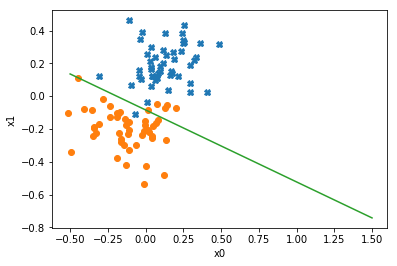

iter =  18
theta = 0.0374, 3.8638, 7.5642
cost function = 0.2051



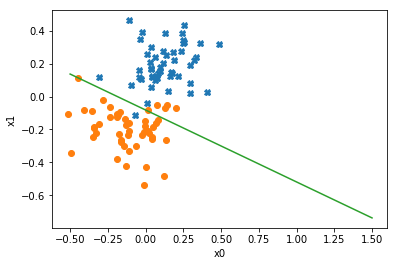

iter =  19
theta = 0.0396, 3.9350, 7.7670
cost function = 0.2006



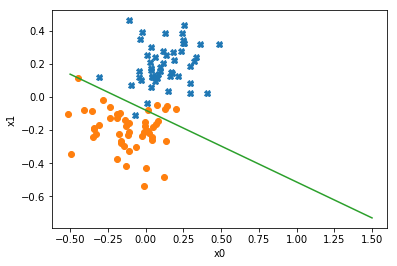

iter =  20
theta = 0.0418, 4.0016, 7.9620
cost function = 0.1964



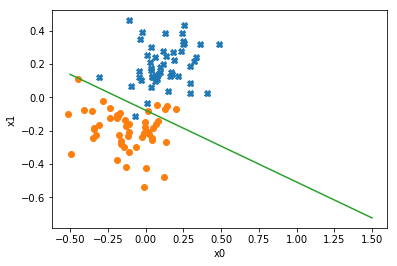

iter =  21
theta = 0.0439, 4.0641, 8.1500
cost function = 0.1926



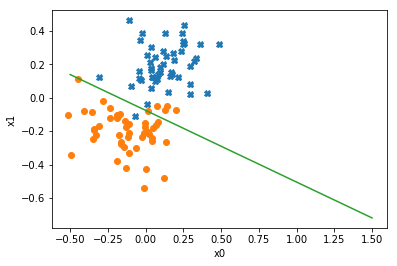

iter =  22
theta = 0.0460, 4.1228, 8.3314
cost function = 0.1890



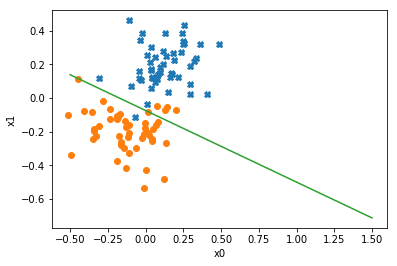

iter =  23
theta = 0.0480, 4.1781, 8.5068
cost function = 0.1857



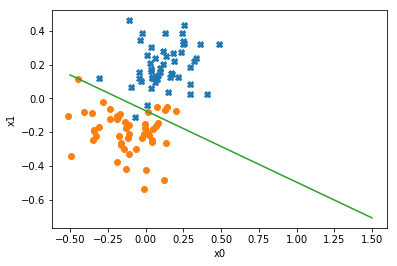

iter =  24
theta = 0.0500, 4.2302, 8.6765
cost function = 0.1826



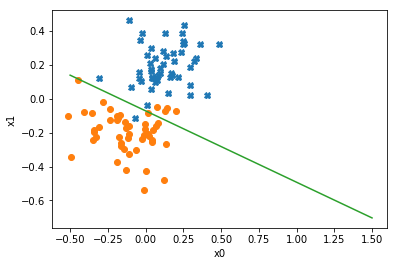

iter =  25
theta = 0.0519, 4.2794, 8.8411
cost function = 0.1797



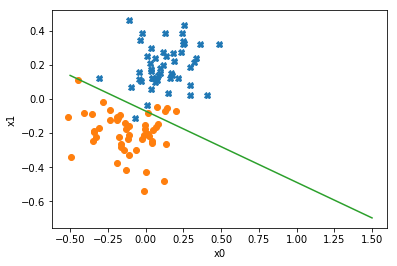

iter =  26
theta = 0.0538, 4.3259, 9.0008
cost function = 0.1769



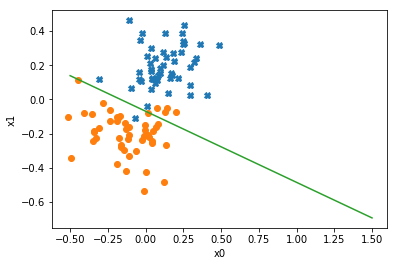

iter =  27
theta = 0.0557, 4.3700, 9.1559
cost function = 0.1744



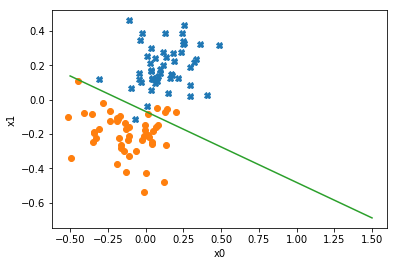

iter =  28
theta = 0.0575, 4.4117, 9.3068
cost function = 0.1720



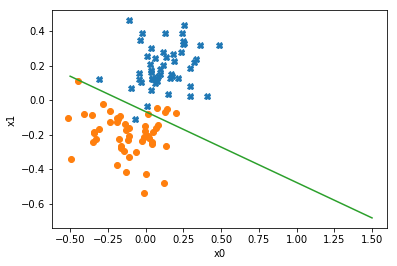

iter =  29
theta = 0.0593, 4.4513, 9.4537
cost function = 0.1697



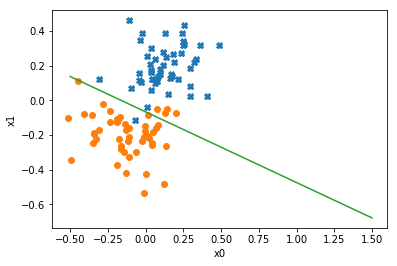

iter =  30
theta = 0.0610, 4.4890, 9.5967
cost function = 0.1675



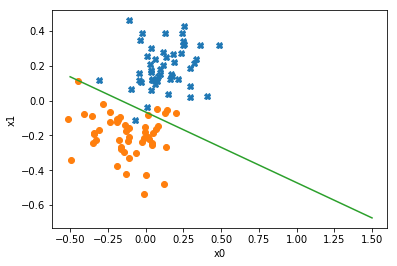

iter =  31
theta = 0.0627, 4.5247, 9.7362
cost function = 0.1655



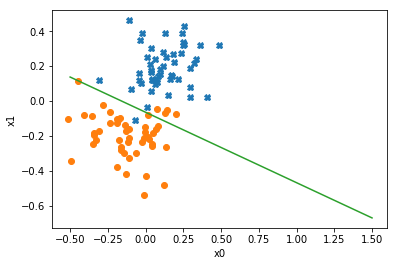

iter =  32
theta = 0.0644, 4.5588, 9.8724
cost function = 0.1635



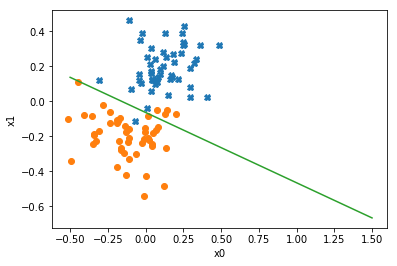

iter =  33
theta = 0.0660, 4.5912, 10.0053
cost function = 0.1617



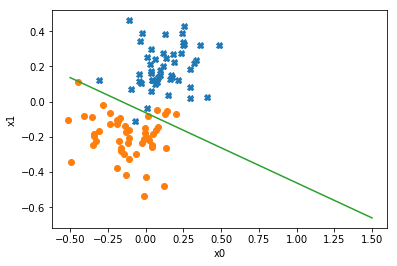

iter =  34
theta = 0.0676, 4.6222, 10.1352
cost function = 0.1599



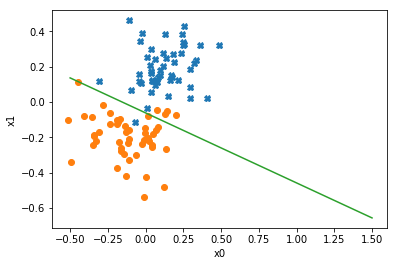

iter =  35
theta = 0.0691, 4.6517, 10.2622
cost function = 0.1582



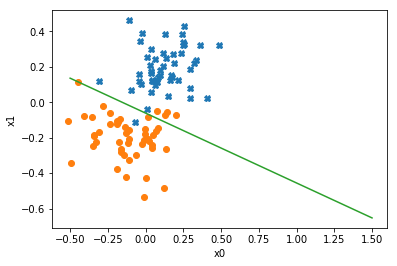

iter =  36
theta = 0.0707, 4.6798, 10.3865
cost function = 0.1566



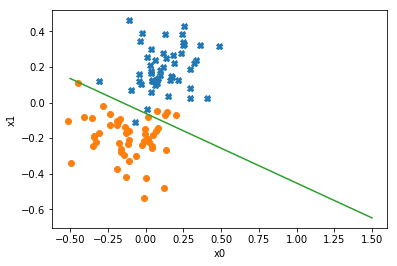

iter =  37
theta = 0.0722, 4.7068, 10.5081
cost function = 0.1551



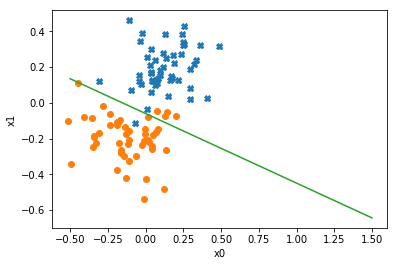

iter =  38
theta = 0.0736, 4.7325, 10.6272
cost function = 0.1536



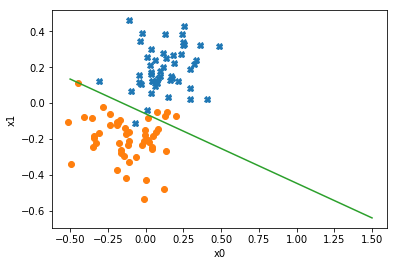

iter =  39
theta = 0.0751, 4.7571, 10.7440
cost function = 0.1522



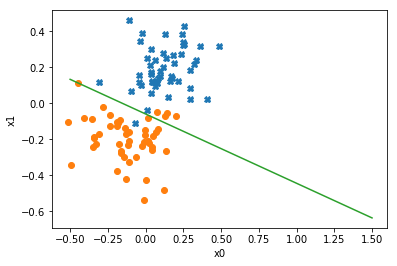

iter =  40
theta = 0.0765, 4.7807, 10.8585
cost function = 0.1509



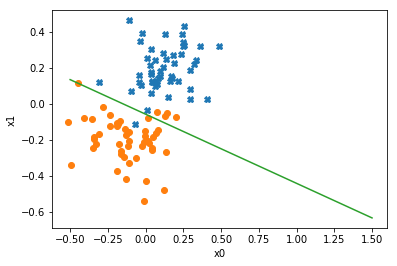

iter =  41
theta = 0.0779, 4.8033, 10.9707
cost function = 0.1496



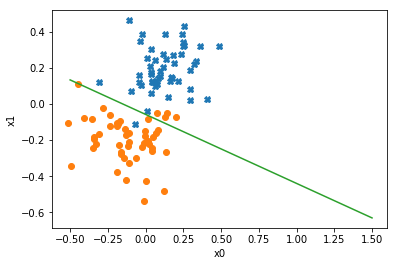

iter =  42
theta = 0.0792, 4.8250, 11.0809
cost function = 0.1483



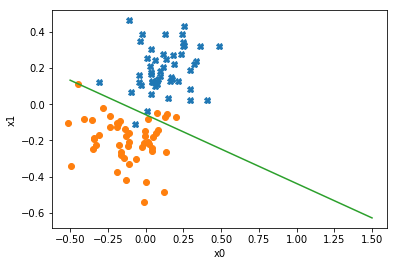

iter =  43
theta = 0.0805, 4.8458, 11.1891
cost function = 0.1471



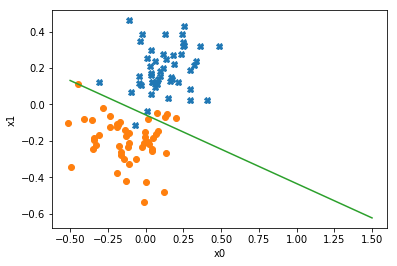

iter =  44
theta = 0.0818, 4.8657, 11.2953
cost function = 0.1460



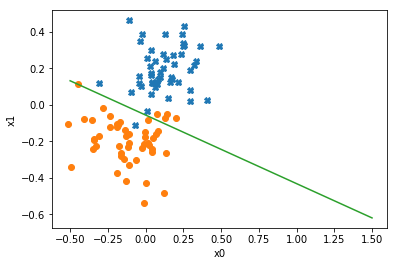

iter =  45
theta = 0.0831, 4.8848, 11.3997
cost function = 0.1448



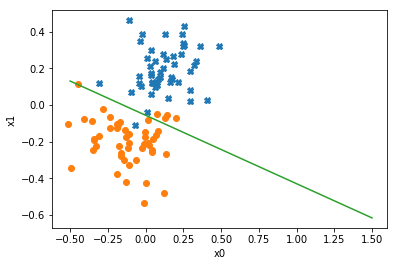

iter =  46
theta = 0.0844, 4.9032, 11.5022
cost function = 0.1438



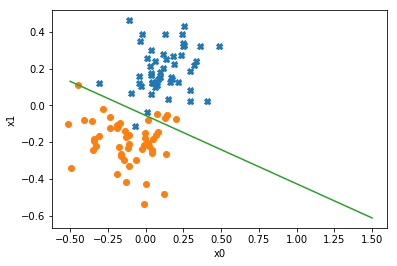

iter =  47
theta = 0.0856, 4.9209, 11.6031
cost function = 0.1427



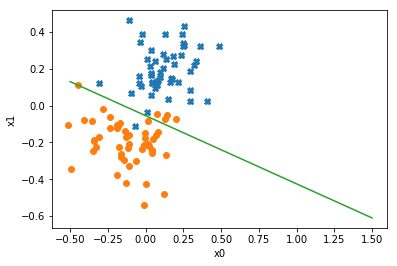

iter =  48
theta = 0.0868, 4.9379, 11.7023
cost function = 0.1417



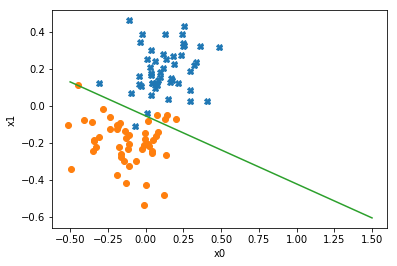

iter =  49
theta = 0.0880, 4.9543, 11.7998
cost function = 0.1407



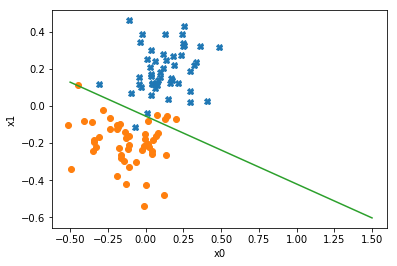

In [14]:
for i in range(50):
    print("iter = ", i)
    print("theta = %.4f, %.4f, %.4f" % (theta[0,0], theta[1,0], theta[2,0]))
    print("cost function = %.4f\n" % v(X_prime,y,theta))
    
    plt.plot(X[:M_half,0], X[:M_half,1], 'X'), plt.xlabel('x0'), plt.ylabel('x1')
    plt.plot(X[M_half:,0], X[M_half:,1], 'o'), plt.xlabel('x0'), plt.ylabel('x1')
    plt.plot(axis_x1, (-1*axis_x1*(theta[1] - 1) - theta[0] - 0.5)/(theta[2] - 1) )

    
    plt.show()
    
    theta = gradient_step(X_prime, y, theta, 10)

iter =  50
theta = 0.0891, 4.9700, 11.8959
cost function = 0.1398



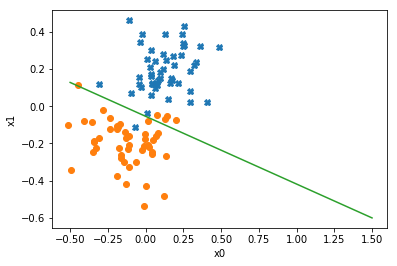

In [15]:
i += 1

print("iter = ", i)
print("theta = %.4f, %.4f, %.4f" % (theta[0,0], theta[1,0], theta[2,0]))
print("cost function = %.4f\n" % v(X_prime,y,theta))

plt.plot(X[:M_half,0], X[:M_half,1], 'X'), plt.xlabel('x0'), plt.ylabel('x1')
plt.plot(X[M_half:,0], X[M_half:,1], 'o'), plt.xlabel('x0'), plt.ylabel('x1')
plt.plot(axis_x1, (-1*axis_x1*(theta[1] - 1) - theta[0] - 0.5)/(theta[2] - 1) )


plt.show()